## Ausführung von Ping zu unterschiedlichen Hosts

Zu den unterschiedlichen Hosts wird jeweils n-mal ein Ping durchgeführt und die Ausgabe in ein Tupel mit dem dazugehörigen Hostnamen gespeichert.

In [3]:
import subprocess

hosts = ('uni-due.de', 'whitehouse.gov', 'icmp.org')
log = []
for host in hosts:
    process = subprocess.Popen(['ping', '-c', "50", host], stdout=subprocess.PIPE)
    for line in process.stdout:
        # die zeile ist ein raw string, muss also dekodiert werden
        line = line.decode('utf-8')
        # in der zeile ist bereits ein zeilenumbruch vorhanden
        print(line, end='')
        log.append((host, line))

PING uni-due.de (132.252.185.170) 56(84) bytes of data.
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=1 ttl=126 time=0.279 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=2 ttl=126 time=0.327 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=3 ttl=126 time=0.306 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=4 ttl=126 time=0.281 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=5 ttl=126 time=0.381 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=6 ttl=126 time=0.371 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=7 ttl=126 time=0.306 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=8 ttl=126 time=0.369 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=9 ttl=126 time=0.362 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=10 ttl=126 time=0.289 ms
64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=11 ttl=126 time=0.330 ms
64 bytes from addc

## Parsen der Rohdaten

Die Angabe der Round trip time ist gegeben durch z.B. den Text `time=166 ms`. Dieser kann durch einen regulären Ausdruck aus einer Zeile gefiltert werden.

In [4]:
import re

data = []
for host, line in log:
    # Der regulaere Ausdruck findet Zeitangaben (time=) bei Bedarf durch . getrennt
    m = re.search('time=(\d+(\.\d+)?)', line)
    if m:
        groups = m.groups()
        time = float(groups[0])
        data.append((host, time))
print(data)

[('uni-due.de', 0.279), ('uni-due.de', 0.327), ('uni-due.de', 0.306), ('uni-due.de', 0.281), ('uni-due.de', 0.381), ('uni-due.de', 0.371), ('uni-due.de', 0.306), ('uni-due.de', 0.369), ('uni-due.de', 0.362), ('uni-due.de', 0.289), ('uni-due.de', 0.33), ('uni-due.de', 0.322), ('uni-due.de', 0.32), ('uni-due.de', 0.303), ('uni-due.de', 0.334), ('uni-due.de', 0.317), ('uni-due.de', 0.36), ('uni-due.de', 0.323), ('uni-due.de', 0.325), ('uni-due.de', 0.291), ('uni-due.de', 0.313), ('uni-due.de', 0.283), ('uni-due.de', 0.342), ('uni-due.de', 0.34), ('uni-due.de', 0.316), ('uni-due.de', 0.288), ('uni-due.de', 0.369), ('uni-due.de', 0.298), ('uni-due.de', 0.317), ('uni-due.de', 0.294), ('uni-due.de', 0.332), ('uni-due.de', 0.321), ('uni-due.de', 0.311), ('uni-due.de', 0.313), ('uni-due.de', 0.311), ('uni-due.de', 0.286), ('uni-due.de', 0.33), ('uni-due.de', 0.316), ('uni-due.de', 0.294), ('uni-due.de', 0.301), ('uni-due.de', 0.303), ('uni-due.de', 0.324), ('uni-due.de', 0.302), ('uni-due.de', 

## Statistiken zum Ping

In der Aufgabenstellung war z.B. nach dem Mittelwert und der Varianz gefragt. Gerade bei der Varianz ergaben sich Schwierigkeiten. 

Wikipedia:

> Sie beschreibt die erwartete quadratische Abweichung der Zufallsvariablen von ihrem Erwartungswert.

Zum Erwartungswert ist eine entsprechende Quellenangabe vorhanden. Ansonsten ist folgendes Video zu empfehlen:
[Zufallsgröße, Erwartungswert, Faires Spiel, ...](https://www.youtube.com/watch?v=7zJ3GYBVU6Q)

Da im Beispiel alle Möglichkeiten und deren Wahrscheinlichkeit bekannt sind kann der Erwartungswert einfach bestimmt werden: $\sum_{i \in I} x_i P(X = x_i)$

Da hier aber nicht von bekannten möglichen Werten ausgegangen wird ist eine [unkorrigierte Stichprobenvarianz](https://de.wikipedia.org/wiki/Stichprobenvarianz) das Mittel der Wahl.

$s^2 = \frac{1}{n - 1} \sum_{i = 1}^n (x_i - \overline{x})^2$

In [17]:
import itertools
import numpy

# Die zu gruppierenden Daten muessen zunaechst nach demselben Schluessel
# sortiert werden, siehe http://stackoverflow.com/questions/773/how-do-i-use-pythons-itertools-groupby
data = sorted(data, key=lambda t: t[0])
for host, g in itertools.groupby(data, key=lambda t: t[0]):

    rtt = [e[1] for e in g]
    max_rtt = max(rtt)
    min_rtt = min(rtt)
    
    # alternativer durchschnitt: sum(rtt) / len(rtt)
    # aber achtung vor rundungsfehlern!
    mean_rtt = numpy.mean(rtt) 
    
    # zur varianzberechnung siehe 
    # http://www.frustfrei-lernen.de/mathematik/varianz-berechnen.html
    variance = 1 / (len(rtt) - 1) * sum([numpy.power(x - mean_rtt, 2) for x in rtt])
    
    # die standardvarianz ist die wurzel der varianz
    std_deviation = numpy.sqrt(variance)
    
    print('              Host: %s' % host)
    print('           Max RTT: %f' % max_rtt)
    print('           Min RTT: %f' % min_rtt)
    print('  Durchschnitt RTT: %f' % mean_rtt)
    print('           Varianz: %f' % variance)
    print('Standardabweichung: %f' % std_deviation)
    print()

              Host: icmp.org
           Max RTT: 202.000000
           Min RTT: 163.000000
  Durchschnitt RTT: 172.352941
           Varianz: 116.117647
Standardabweichung: 10.775790

              Host: uni-due.de
           Max RTT: 0.385000
           Min RTT: 0.272000
  Durchschnitt RTT: 0.319000
           Varianz: 0.000744
Standardabweichung: 0.027279

              Host: whitehouse.gov
           Max RTT: 11.000000
           Min RTT: 10.100000
  Durchschnitt RTT: 10.304000
           Varianz: 0.019984
Standardabweichung: 0.141364



## Anzeige eines Histograms

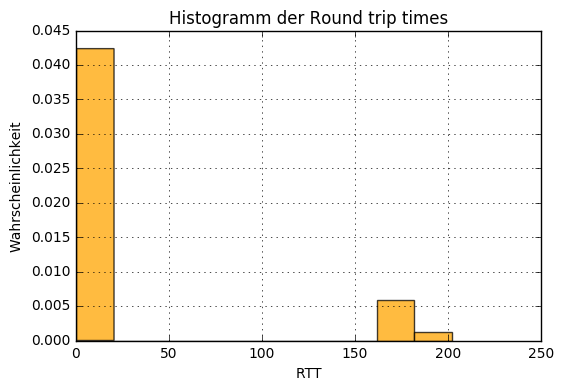

In [20]:
import matplotlib.pyplot as plt

times = [e[1] for e in data]
plt.hist(times, 10, normed=1, facecolor='orange', alpha=0.75)

plt.xlabel('RTT')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Histogramm der Round trip times')
plt.grid(True)
plt.show()

## CDF

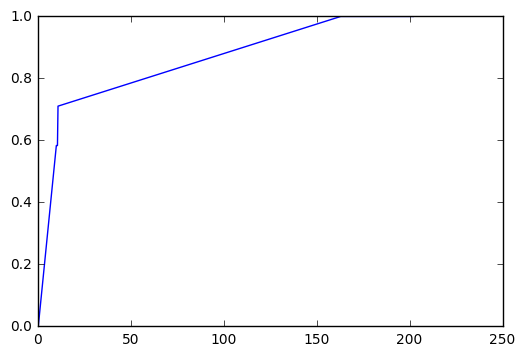

In [28]:
import scipy.stats as stats

times = sorted(times)
plt.plot(times, stats.binom.cdf(times, 50, 0.2))
plt.show()